# Lecture 2 - Python basics: Modules, Classes, and Methods

In this lecture, we discuss how to make and use our own modules. We also discuss how Python implements object orientation, which allows programs to be structured into classes, each responsible for its own behavior. This helps to keep a check on the
complexity of our programs and generally makes them easier to manage. The main mechanisms for doing this are classes and methods. You have already used built-in classes and methods without necessarily knowing it.

__Outline:__
  * [1. Modules ](#Ch1)
      * [1.1 Using modules ](#Ch11)
      * [1.2 Useful Python libraries ](#Ch12)
      * [1.3 Test yourself ](#Ch13)
  * [2. Object Oriented](#Ch2)
  * [3. Defining Classes](#Ch3)
      * [3.1 Inheritance](#Ch31)
      * [3.2 Summary](#Ch32)
  * [4. Reading files](#Ch4)
      * [4.1 Files](#Ch41)
          * [4.1.1 Reading files](#Ch411)
          * [4.1.2 Reading big files](#Ch412)
          * [4.1.3 Writing files](#Ch413)
          * [4.1.4 The file system](#Ch414)
          * [4.1.5 Pickling](#Ch415)
          * [4.1.6 JSON ](#Ch416)        
  * [5. Internet](#Ch5)   
  
  



## 1. Modules <a class="anchor" id="Ch1"></a>
Most computer languages have a concept like modules that allows you to create a group of functions that are in a convenient form for others to use—or even for yourself to use on different projects. Python does this grouping of functions in a very simple and elegant way. Essentially, any file with Python code in it can be thought of as a module with the same name as the file. However, before we get into writing our own modules, let’s look at how we use the modules already installed with Python.

### 1.1 Using modules<a class="anchor" id="Ch11"></a>
In one of the examples in the last lecture, we already use the module __random__:

In [ ]:
import random
random.randint(1,6)

The first thing we do here is tell Python that we want to use the random module by using the _import_ command. Somewhere in the Python installation is a file called _random.py_ that contains a _randint_ function as well as some other functions. With so many modules available to us, there is a real danger that different modules might have functions with the same name. In such a case, how would Python know which one to use? Fortunately, we do not have to worry about this happening because we have imported the module, and none of the functions in the module are visible unless we prepend the _module name_ and then a dot onto the front of the function name. Try omitting the module name, like this:

In [ ]:
# this code gives an intentional error
import random
randint(1,6)

Having to put the module name in front of every call to a function that’s used a lot can get tedious. Fortunately, we can make this a little easier by adding to the import command as follows:

In [ ]:
import random as r
r.randint(1,6)

This gives the module a local name within our program of just _r_ rather than _random_, which saves us a bit of typing.
If you are certain a function you want to use from a library is not going to conflict with anything in your program, you can take things a stage further, as follows:

In [ ]:
from random import randint
randint(1,6)

To go even further, you can import everything from the module in one fell swoop. Unless you know exactly what is in the module, however, this is not normally a good idea, but you can do it:

In [ ]:
from random import *
randint(1,6)

In this case the __*__ means "everything".

### 1.2 Useful Python libraries <a class="anchor" id="Ch12"></a>
So far we have used the random module, but other modules are included in Python. These modules are often called Python’s standard library. There are too many of these modules to list in full. However, you can always find a complete list of Python modules at http://docs.python.org/release/3.1.5/library/index.html. Here are some of the most useful modules you
should take a look at:

• __string__ String utilities

• __datetime__ For manipulating dates and times

• __pickle__ For saving and restoring data structures on file 

• __urllib.request__ For reading web pages 

• __tkinter__ For creating graphical user interfaces 

• __numpy__ mathematics, arrays and matrices  (usefull guide for Matlab users: https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)

• __scipy__ data-processing, analyse-tools

• __matplotlib__ data visualisation


##### 1.2.1 example using matplotlib & numpy
Since you are familiar with the plot concept in Matlab, find an example of plotting a curve below. Test yourself to see whether you understand the elements that are used in the example.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)
y2 = 4*np.cos(2*x)

# plot
ax = plt.subplot(2, 1, 1)
ax.plot(x, y, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))


plt.xlabel('time (s)')
plt.ylabel('sway (mm)')
plt.title('Synthetic data to demonstrate plot functions')
plt.grid(True)

# plot
ax =plt.subplot(2, 1, 2)
ax.plot(x, y2, linewidth=2.0)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8)) 
plt.xlabel('time (s)')
plt.ylabel('CoP (mm)')
plt.grid(True)

plt.show()

### 1.3 Test yourself <a class="anchor" id="Ch13"></a>

Given is a dataset. Plot both datalines in the same plot. Provide a legenda (data1,data2). Don't forget the labels on the axes. You can find more information [here](https://matplotlib.org/3.5.0/tutorials/introductory/pyplot.html) 

In [ ]:
y1 = [2,3,5,2,4,8,4] # plot this with a red dashed line
y2 = [5,5,5,6,1,1,1] # plot this with green triangles
time = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]

# Example: test yourself

## Put your own code here ##




## 2. Object Oriented <a class="anchor" id="Ch2"></a>
Object orientation has much in common with modules. It shares the same goals of trying to group related items together so that they are easy to maintain and find. As the name suggests, object orientation is about objects. We have been unobtrusively using objects already. A string is an object, for example. Thus, when we type


In [ ]:
'abc'.upper()

We are telling the string _'abc'_ that we want a copy of it, but in uppercase. In object-oriented terms, _abc_ is an _instance_ of the built-in class _str_ and __upper__ is a _method_ on the class _str_. We can actually find out the class of an object, as shown here (note double underscores before and after the word class):

In [ ]:
'abc'.__class__

In [ ]:
[1].__class__

In [ ]:
12.34.__class__

## 3. Defining Classes <a class="anchor" id="Ch3"></a>
We are now going to create a class that does the job of converting measurements from one unit to another by multiplying a value by a scale factor. We will give the class the name __ScaleConverter__. Here is the listing for the whole class, plus a few lines of code to test it:

In [ ]:
class ScaleConverter:
    def __init__(self, units_from, units_to, factor):
        self.units_from = units_from
        self.units_to = units_to
        self.factor = factor
        
    def description(self):
        return 'Convert ' + self.units_from + ' to ' + self.units_to
    
    def convert(self,value):
        return value*self.factor
    
c1 = ScaleConverter('inches','mm',25)
print(c1.description())
print('converting 2 inches')
print(str(c1.convert(2))+ c1.units_to)  

The first line is fairly obvious: It states that we are beginning the definition of a class called __ScaleConverter__. The colon (:) on the end indicates that all that follows is part of the class definition until we get back to an indent level of the left margin again. Inside the __ScaleConverter__, we can see what look like three function definitions. These functions
belong to the _class_; they cannot be used except via an instance of the class. These kinds of functions that belong to a class are called _methods_.
The first method, __init__, looks a bit strange—its name has two underscore characters on either side. When Python is creating a new instance of a class, it automatically calls the method __init__. The number of parameters that __init__ should have depends on how many parameters are supplied when an instance of the class is made. To unravel that, we need to look at this line at the end of the file:

        c1 = ScaleConverter('inches','mm',25)

This line creates a new instance of the ScaleConverter, specifying what the units being converted from and to are, as well as the scaling factor. The __init__ method must have all these parameters, but it must also have a parameter called self as the first parameter:

        def __init__(self, units_from, units_to, factor):

The parameter self refers to the object itself. Now, looking at the body of the __init__ method, we see some assignments:

        self.units_from = units_from
        self.units_to = units_to
        self.factor = factor

Each of these assignments creates a variable that belongs to the object and has its initial value set from the parameters passed in to __init__. To recap, when we create a new __ScaleConverter__ by typing something like 

          c1 = ScaleConverter('inches','mm',25)

Python creates a new instance of ScaleConverter and assigns the values 'inches', 'mm', and 25 to its three variables: _self.units_from_, _self.units_to_, and _self.factor_.
The term _encapsulation_ is often used in discussions of classes. It is the job of a class to encapsulate everything to do with the class. That means storing data (like the three variables) and things that you might want to do with the data in the form of the description and convert methods.The first of these (description) takes the information that the Converter knows about its units and creates a string that describes it. As with __init__, all methods must have a first parameter of self. The method will probably need it to access the data of the class to which it belongs. To demonstrate:


In [ ]:
silly_converter = ScaleConverter('apples','grapes',74)
silly_converter.description()

In [ ]:
silly_converter.convert(3)

### 3.1 Inheritance <a class="anchor" id="Ch31"></a>
The ScaleConverter class is okay for units of length and things like that; however, it would not work for something like converting temperature from degrees Celsius (C) to degrees Fahrenheit (F). The formula for this is F = C * 1.8 + 32. There is both a scale factor (1.8) and an offset (32). Let’s create a class called __ScaleAndOffsetConverter__ that is just like ScaleConverter, but with a factor as well as an offset. One way to do this would simply be to copy the whole of the code
for __ScaleConverter__ and change it a bit by adding the extra variable. It might, in fact, look something like this:

In [ ]:
class ScaleAndOffsetConverter:
    def __init__(self, units_from, units_to, factor,offset):
        self.units_from = units_from
        self.units_to = units_to
        self.factor = factor
        self.offset = offset
        
    def description(self):
        return 'Convert ' + self.units_from + ' to ' + self.units_to
    
    def convert(self,value):
        return value*self.factor + self.offset
    
c2 = ScaleAndOffsetConverter('C','F',1.8,32)
print(c2.description())
print('converting 20C')
print(str(c2.convert(20))+ c2.units_to)  

Assuming we want both types of converters in the program we are writing, then this is a bad way of doing it. It’s bad because we are repeating code. The description method is actually identical, and __init__ is almost the same. A much better way is to use something called _inheritance_. The idea behind inheritance in classes is that when you want a specialized version of a class that already exists, you inherit all the parent class’s variables and methods and just add new ones or override the ones that are different. Figure 5-2 shows a class diagram for the two classes, indicating how __ScaleAndOffsetConverter__ inherits from __ScaleConverter__, adds a new variable (offset), and overrides the method convert (because it will work a bit differently).

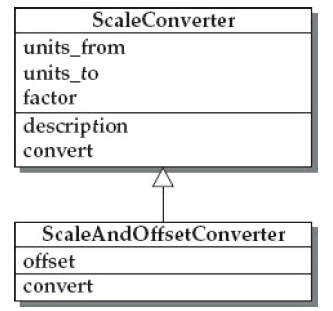

Here is the class definition for __ScaleAndOffsetConverter__ using inheritance:

In [ ]:
class ScaleAndOffsetConverter(ScaleConverter):
    def __init__(self, units_from, units_to, factor, offset):
        ScaleConverter.__init__(self, units_from, units_to, factor)
        self.offset = offset
        
    def convert(self,value):
        return value*self.factor+self.offset

The first thing to notice is that the class definition for __ScaleAndOffsetConverter__ has __ScaleConverter__ in parentheses immediately after it. That is how you specify the parent class for a class.
The __init__ method for the new “subclass” of __ScaleConverter__ first invokes the __init__ method of ScaleConverter before defining the new variable _offset_. The convert method will override the convert method in the parent class because we need to add on the _offset_ for this kind of converter. You can run and experiment with the two classes together:

In [ ]:
c1 = ScaleConverter('inches','mm',25)
print(c1.description())

In [ ]:
print('converting 2 inches')

In [ ]:
print(str(c1.convert(2))+c1.units_to)

In [ ]:
c2 =ScaleAndOffsetConverter('C','F', 1.8, 32)
print(c2.description())

In [ ]:
print('converting 20C')

In [ ]:
print(str(c2.convert(20))+c2.units_to)

It’s a simple matter to convert these two classes into a module that we can use in other programs. In fact, __we will use this 
module in the next section where we attach a graphical user interface to it.
To turn this file into a module, we should first take the test code off the end of and then save it under a sensible name. Let’s call it _converters.py_. The module must be in the same directory as any program that wants to use it.__
To use the module you use the command:
        
        import converters
        
### 3.2 Summary <a class="anchor" id="Ch32"></a>
Lots of modules are available for Python, and some are specifically for the Raspberry Pi, such as the _RPi.GPIO_ library for controlling the GPIO pins. As you work through this course, you will encounter various modules. You will also find that as the programs you write get more complex, the benefits of an object-oriented approach to designing and coding your projects will keep everything more manageable.

## 4. Reading files  <a class="anchor" id="Ch4"></a>

Python makes it easy for your programs to use saved files and connect to the Internet. You can read data from files, write data to files, and fetch content from the Internet. You can even check for new mail and tweet—all from your program.

### 4.1 Files <a class="anchor" id="Ch41"></a>
When you run a Python program, any values you have in variables will be lost. For your experiments it is therefore important that you can save your values in a file, and read data from files.

#### 4.1.1 Reading Files <a class="anchor" id="Ch411"></a>
Python makes reading the contents of a file extremely easy. As an example, create a text file(e.g. notepad) and save the following list of data names. Save the file as _participants_data.txt_:

    P01_01042022_1215
    P02_01042022_1240
    P03_01042022_1315
    P04_01042022_1400
    P05_02042022_0900

If you now want to read this file with Python:

In [ ]:
# if this file is not in the same folder as this notebook, then put the foldername in front: folder/file
file = 'participants_data.txt' 

f = open(file)

In [ ]:
data_names = f.read()
data_names

In [ ]:
data_names.splitlines()

In [ ]:
# we can combine these last two lines as follows:
data_names = f.read().splitlines()

You should always call the close command when you are done with a file to free up operating system resources. Leaving a file open can lead to problems.

In [ ]:
f.close()

If a file isn't found, we can get an error like:

    FileNotFoundError                         Traceback (most recent call last)
    C:\607243182.py in <module>
          2 file = 'participants_data.txt'
          3 
    ----> 4 f = open(file)

    FileNotFoundError: [Errno 2] No such file or directory: 'participants_data.txt'
    
 To make this a bit more user friendly, the file-reading code needs to be inside a try command, like this:

In [ ]:
try:
    f = open(file)
    data_names = f.read().splitlines()
    f.close()
except IOError:
    print("Cannot find file: " + file)
    exit()

To test the code above, add an error to your _file_ and see if you get the right error message.

#### 4.1.2 Reading big files <a class="anchor" id="Ch412"></a>

The way we did things in the previous section is fine for a small file containing some strings. However, if we were reading a really huge file (say, several megabytes), then two things would happen. First, it would take a significant amount of time for Python to read all the data. Second, because all the data is read at once, at least as much memory as the file size would be used, and for truly enormous files, that might result in Python running out of memory. 
If you find yourself in the situation where you are reading a big file, you need to think about how you are going to handle it. For example, if you were searching a file for a particular string, you could just read one line of the file at a time, like this:

In [ ]:
file = 'participants_data.txt' 
find_file = 'P04_01042022_1400\n'

try:
    f = open(file)
    line = f.readline()
    while line !='':
        if line == find_file:
            print('participant is in this file')
            break
        line=f.readline()
    f.close()
except IOError:
    print("Cannot find file: " + file)
    exit()

When the function __readline__ gets to the last line of the file, it returns an empty string (''). Otherwise, it returns the contents of the line, including the end-of-line character (\n) . If it reads a blank line that is actually just a gap between lines and not the end of the file, it will return just the end-of-line character (\n). By the program only reading one line at a time, the memory being used is only ever equivalent to one full line.
If the file is not broken into convenient lines, you can specify an argument in read that limits the number of characters read. For example, the following will just read the first 20 characters of a file:


In [ ]:
f = open(file)
f.read(17)


In [ ]:
f.close()

#### 4.1.3 Writing files <a class="anchor" id="Ch413"></a>
Writing files is almost as simple. When a file is opened, as well as specifying the name of the file to open, you can also specify the mode in which to open the file. The mode is represented by a character, and if no mode is specified it is assumed to be _r_ for _read_. The modes are as follows:

• r (read).

• w (write) Replaces the contents of any existing file with that name.

• a (append) Appends anything to be written onto the end of an existing file.

• r+ Opens the file for both reading and writing (not often used).

To write a file, you open it with a second parameter of ' w', ' a', or ' r+'. Here’s an example:

In [ ]:
f = open('test.txt','w')
f.write('This file is not empty')
f.close()

Try finding the file using the file manager just to check it's there. 

#### 4.1.4 The File System <a class="anchor" id="Ch414"></a>
Occasionally, you will need to do some file-system-type operations on files (moving them, copying them, and so on). Python uses Linux to perform these actions, but provides a nice Python-style way of doing them. Many of these functions are in the _shutil_ (shell utility) package. There’s a number of subtle variations on the basic copy and move features that deal with file permissions and metadata. In this section, we just deal with the basic operations. You can refer to the official Python
documentation for any other functions (http://docs.python.org/release/3.l.5/library). Here’s how to copy a file:

In [ ]:
import shutil
shutil.copy('test.txt','test_copy.txt')

Check in the file manager that you now have a copy of the _test.txt_ file

To move a file, either to change its name or move it to a different directory:

In [ ]:
shutil.move('test_copy.txt','test_dup.txt')

This works on directories as well as files. If you want to copy an entire folder—including all its contents and its content’s contents—you can use the function _copytree_. The rather dangerous function _rmtree_, on the other hand, will recursively remove a directory and all its contents— __exercise extreme caution with this one!__
The nicest way of finding out what is in a directory is via _globbing_. The package _glob_ allows you to create a list of files in a directory by specifying a wildcard _(*)_. Here’s an example:

In [ ]:
import glob

glob.glob('*.txt')

If you just want all the files in the folder, you could use this:

In [ ]:
glob.glob('*')

#### 4.1.5 Pickling <a class="anchor" id="Ch415"></a>
Pickling involves saving the contents of a variable to a file in such a way that the file can be later loaded to get the original value back. The most common reason for wanting to do this is to save data between runs of a program. As an example, we can create a complex list containing another list and various other data objects and then pickle it into a file called _mylist.pickle_, like so:

In [ ]:
mylist = ['a',123,[4,5,True]]
mylist

In [ ]:
import pickle
f = open('mylist.pickle','wb')
pickle.dump(mylist,f)
f.close()

If you find the file and open it in an editor to have a look, you will see something cryptic. That is to be expected; it is text, but it is not meant to be in human-readable form. The pickle file is binary (that's why you open the file in 'wb' mode)  
To reconstruct a pickle file into an object, here is what you do:

In [ ]:
f = open('mylist.pickle','rb')
other_array = pickle.load(f)
f.close()

other_array

#### 4.1.6 JSON  <a class="anchor" id="Ch416"></a>
JSON is a text format for representing data. It is used both in files and in web services using JSON as a common interchange format for data. Python makes it really easy to use JSON by creating lists and dictionaries from JSON text retrieved from a file of from the internet.

As an example, create the following JSON file and save it as ' _data_experiments.json_ '

    {"participants":[
            {"name": "P01_01042022_1215", "age": 23, "weight": 63},
            {"name": "P02_01042022_1240", "age": 56, "weight": 83},
            {"name": "P03_01042022_1315", "age": 76, "weight": 58},
            {"name": "P04_01042022_1400", "age": 33, "weight": 100},
            {"name": "P05_02042022_0900", "age": 20, "weight": 87}
            
     ]}
     
When it comes to JSON, think of a {and} as enclosing a Python directory.In this case the directory has a key of string "participants" and value that is a list contained by [ and ].There are three values in that list, both of which are themselves dictionaries containing information about the participants.

Each particiant dictionary has keys of "name", "age", and "weight". The name token is a string enclosed within quotes and the age and weight are numbers (and so do not have quotes around them). 

Now let's try to import your saved JSON file.

In [ ]:
import json

f = open('data_experiments.json')
j = json.load(f)
f.close()

print(j['participants'][1]['name'])

In [ ]:
print(j['participants'][1]['age'])

The first thing we do is import the json library. We then open the file _data_experiments.json_, and because json is in a text format, unlike the pickle file, we do not have to open it as a binary file. 
The json method _load_ reads the contents of the files and converts it into a dictionary. This is then assigned to the variable _j_. The files are then closed, as we have read what we need from it. 
The final line of the program shows how you can use the _[]_ notation to navigate into the structure of dictionaries and lists that have been created. This first uses ['participants'] to retrieve the list of participants and the uses [1] to select item 1 in the list (the second item) and the ['name'] selects the participant name of the second participant. 

## 5. Internet <a class="anchor" id="Ch5"></a>
As well as being full of webpages, the internet is also a source of information for your programs rather then viewing them in the browser.Such web services are available for pretty much anything, from currency rates and stock prices to wheather forecasts. The software on the server for such web services is called API (Application Programming Interface) and APIs generally use JSON as a way to communicate with your programs. 

As an example we are going to use the service called _wheatherstack.com_. This service is for __free__, as long as you don't make too many demands on it. Therefore it wants to track your use and so you need to register an account. Go to https://weatherstack.com and register an account. Then find your key by clicking on the Dashboard button.

You need to copy this key and pastit into the 'key=' line of the program:


In [ ]:
import json
import urllib.parse, urllib.request


url = 'http://api.weatherstack.com/current'
city = urllib.parse.quote('Delft')
key =  "" # paste your key here!


response = urllib.request.urlopen(url+ '?access_key=' + key + '&query='+ city)
j = json.load(response)

print(j)


As you can see, we have received a whole load of information back from the API that we could make use of in our programs.
The program uses the _urllib_ library to perform the web request, contacting weatherstack's API, so this library has to be imported. Three variables are used, which will be assembled into the full URL to be sent to the API. They are the base URL, the API key, and the city. URLs cannot have spaces in them, but some city names (like Den Haag) do. So, the method _urllib.parse.quote_ is used to convert spaces into the %20 escape characters expected in a URL.
_urllib.request.urlopen_ opens a connection to the API as if yu were opening a file  on your machine, and the _json.load_ converts this into the JSON strcuture.

To extract the current weather:

In [ ]:
print(j['current']['weather_descriptions'][0])

Sources:
* Monk,Simon, Programming the Raspberry Pi, Getting Started with Python